load libraries

In [1]:
import os
import cv2
import glob
import numpy as np
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *

Using TensorFlow backend.


# 加载数据集

In [2]:
basedir = "/ext/Data/distracted_driver_detection/"

model_image_size = 299

print("-------- loading train data")
X_train = list()
y_train = list()
for i in range(10):
    dir = os.path.join(basedir, "train", "c%d"%i)
    image_files = glob.glob(os.path.join(dir,"*.jpg"))
    print("loding {}, image count={}".format(dir, len(image_files)))
    for image_file in image_files:
        image = cv2.imread(image_file)
        X_train.append(cv2.resize(image, (model_image_size, model_image_size)))
        label = np.zeros(10, dtype=np.uint8)
        label[i]=1
        y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)
        
print("-------- loading valid data")
X_valid = list()
y_valid = list()
for i in range(10):
    dir = os.path.join(basedir, "valid", "c%d"%i)
    image_files = glob.glob(os.path.join(dir,"*.jpg"))
    print("loding {}, image count={}".format(dir, len(image_files)))
    for image_file in image_files:
        image = cv2.imread(image_file)
        X_valid.append(cv2.resize(image, (model_image_size, model_image_size)))
        label = np.zeros(10, dtype=np.uint8)
        label[i]=1
        y_valid.append(label)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

-------- loading train data
loding /ext/Data/distracted_driver_detection/train/c0, image count=2308
loding /ext/Data/distracted_driver_detection/train/c1, image count=2096
loding /ext/Data/distracted_driver_detection/train/c2, image count=2136
loding /ext/Data/distracted_driver_detection/train/c3, image count=2185
loding /ext/Data/distracted_driver_detection/train/c4, image count=2160
loding /ext/Data/distracted_driver_detection/train/c5, image count=2152
loding /ext/Data/distracted_driver_detection/train/c6, image count=2164
loding /ext/Data/distracted_driver_detection/train/c7, image count=1843
loding /ext/Data/distracted_driver_detection/train/c8, image count=1771
loding /ext/Data/distracted_driver_detection/train/c9, image count=1972
-------- loading valid data
loding /ext/Data/distracted_driver_detection/valid/c0, image count=181
loding /ext/Data/distracted_driver_detection/valid/c1, image count=171
loding /ext/Data/distracted_driver_detection/valid/c2, image count=181
loding /ext

# 分为训练集和验证集

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(20787, 299, 299, 3)
(20787, 10)
(1637, 299, 299, 3)
(1637, 10)


# 构建模型

https://github.com/fchollet/keras/blob/master/keras/applications/inception_v3.py


In [8]:
base_model = InceptionV3(input_tensor=Input((model_image_size, model_image_size, 3)), weights='imagenet', include_top=False)

for layers in base_model.layers:
    layers.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.25)(x)
x = Dense(10, activation='softmax')(x)
model = Model(base_model.input, x)
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("done")

done


# 训练模型

In [9]:
model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))

model.save("models/inceptionV3-mymodel.h5")

Train on 20787 samples, validate on 1637 samples
Epoch 1/10
20787/20787 [==============================] - 138s - loss: 0.2622 - acc: 0.9044 - val_loss: 0.3066 - val_acc: 0.8996

# 可视化模型

https://keras.io/visualization/

load successed


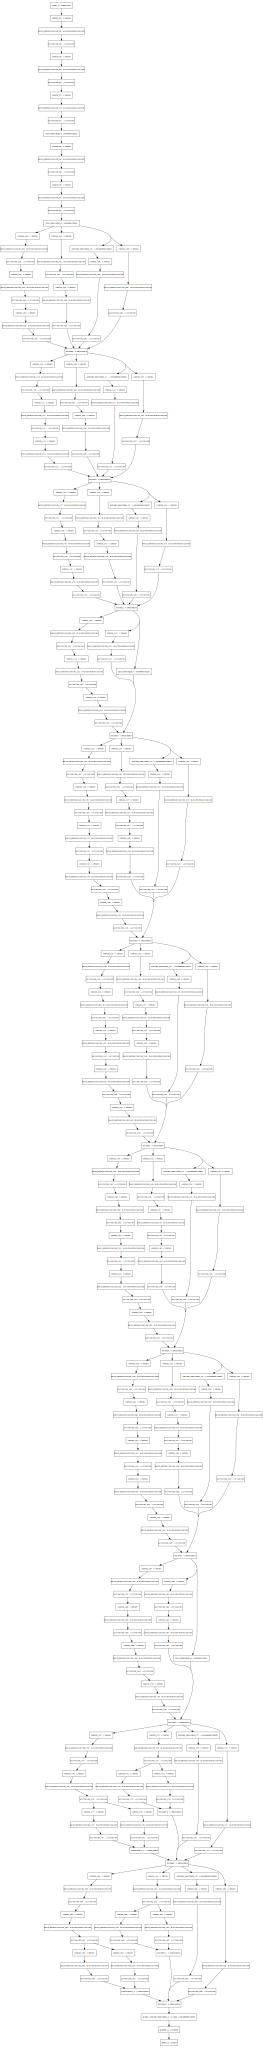

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import *

model = load_model("models/inceptionV3-mymodel.h5")
print("load successed")

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# CAM 可视化

http://cnnlocalization.csail.mit.edu/

![](http://cnnlocalization.csail.mit.edu/framework.jpg)

$cam = (P-0.5)*w*output$

* cam: 类激活图
* P: 概率
* output: 卷积层的输出 2048\*1
* w: 卷积核的权重 x\*x\*2048

In [11]:
z = zip([x.name for x in model.layers], range(len(model.layers)))
for k, v in z:
    print("{} - {}".format(k,v))

input_2 - 0
conv2d_95 - 1
batch_normalization_95 - 2
activation_95 - 3
conv2d_96 - 4
batch_normalization_96 - 5
activation_96 - 6
conv2d_97 - 7
batch_normalization_97 - 8
activation_97 - 9
max_pooling2d_5 - 10
conv2d_98 - 11
batch_normalization_98 - 12
activation_98 - 13
conv2d_99 - 14
batch_normalization_99 - 15
activation_99 - 16
max_pooling2d_6 - 17
conv2d_103 - 18
batch_normalization_103 - 19
activation_103 - 20
conv2d_101 - 21
conv2d_104 - 22
batch_normalization_101 - 23
batch_normalization_104 - 24
activation_101 - 25
activation_104 - 26
average_pooling2d_10 - 27
conv2d_100 - 28
conv2d_102 - 29
conv2d_105 - 30
conv2d_106 - 31
batch_normalization_100 - 32
batch_normalization_102 - 33
batch_normalization_105 - 34
batch_normalization_106 - 35
activation_100 - 36
activation_102 - 37
activation_105 - 38
activation_106 - 39
mixed0 - 40
conv2d_110 - 41
batch_normalization_110 - 42
activation_110 - 43
conv2d_108 - 44
conv2d_111 - 45
batch_normalization_108 - 46
batch_normalization_111 - 

http://docs.opencv.org/trunk/d3/d50/group__imgproc__colormap.html

![](http://docs.opencv.org/trunk/colorscale_jet.jpg)

In [12]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def show_heatmap_image(model_show, weights_show):
    test_dir = os.path.join(basedir,  "test", "test" )
    image_files = glob.glob(os.path.join(test_dir,"*"))
    print(len(image_files))
    
    plt.figure(figsize=(12, 14))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        img = cv2.imread(image_files[2000*i+113])
        img = cv2.resize(img, (model_image_size, model_image_size))
        x = img.copy()
        x.astype(np.float32)
        out, predictions = model_show.predict(np.expand_dims(x, axis=0))
        predictions = predictions[0]
        out = out[0]
        
        max_idx = np.argmax(predictions)
        prediction = predictions[max_idx]

        status = ["safe driving",  " texting - right",  "phone - right",  "texting - left",  "phone - left",  
                  "operation radio", "drinking", "reaching behind", "hair and makeup", "talking"]

        plt.title('c%d |%s| %.2f%%' % (max_idx , status[max_idx], prediction*100))
    
        cam = (prediction - 0.5) * np.matmul(out, weights_show)
        cam = cam[:,:,max_idx]
        cam -= cam.min()
        cam /= cam.max()
        cam -= 0.2
        cam /= 0.8

        cam = cv2.resize(cam, (model_image_size, model_image_size))
        heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
        heatmap[np.where(cam <= 0.2)] = 0

        out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

        plt.axis('off')
        plt.imshow(out[:,:,::-1])
print("done")

done


layer_output Tensor("mixed10_2/concat:0", shape=(?, 8, 8, 2048), dtype=float32)
weights shape (2048, 10)
79726


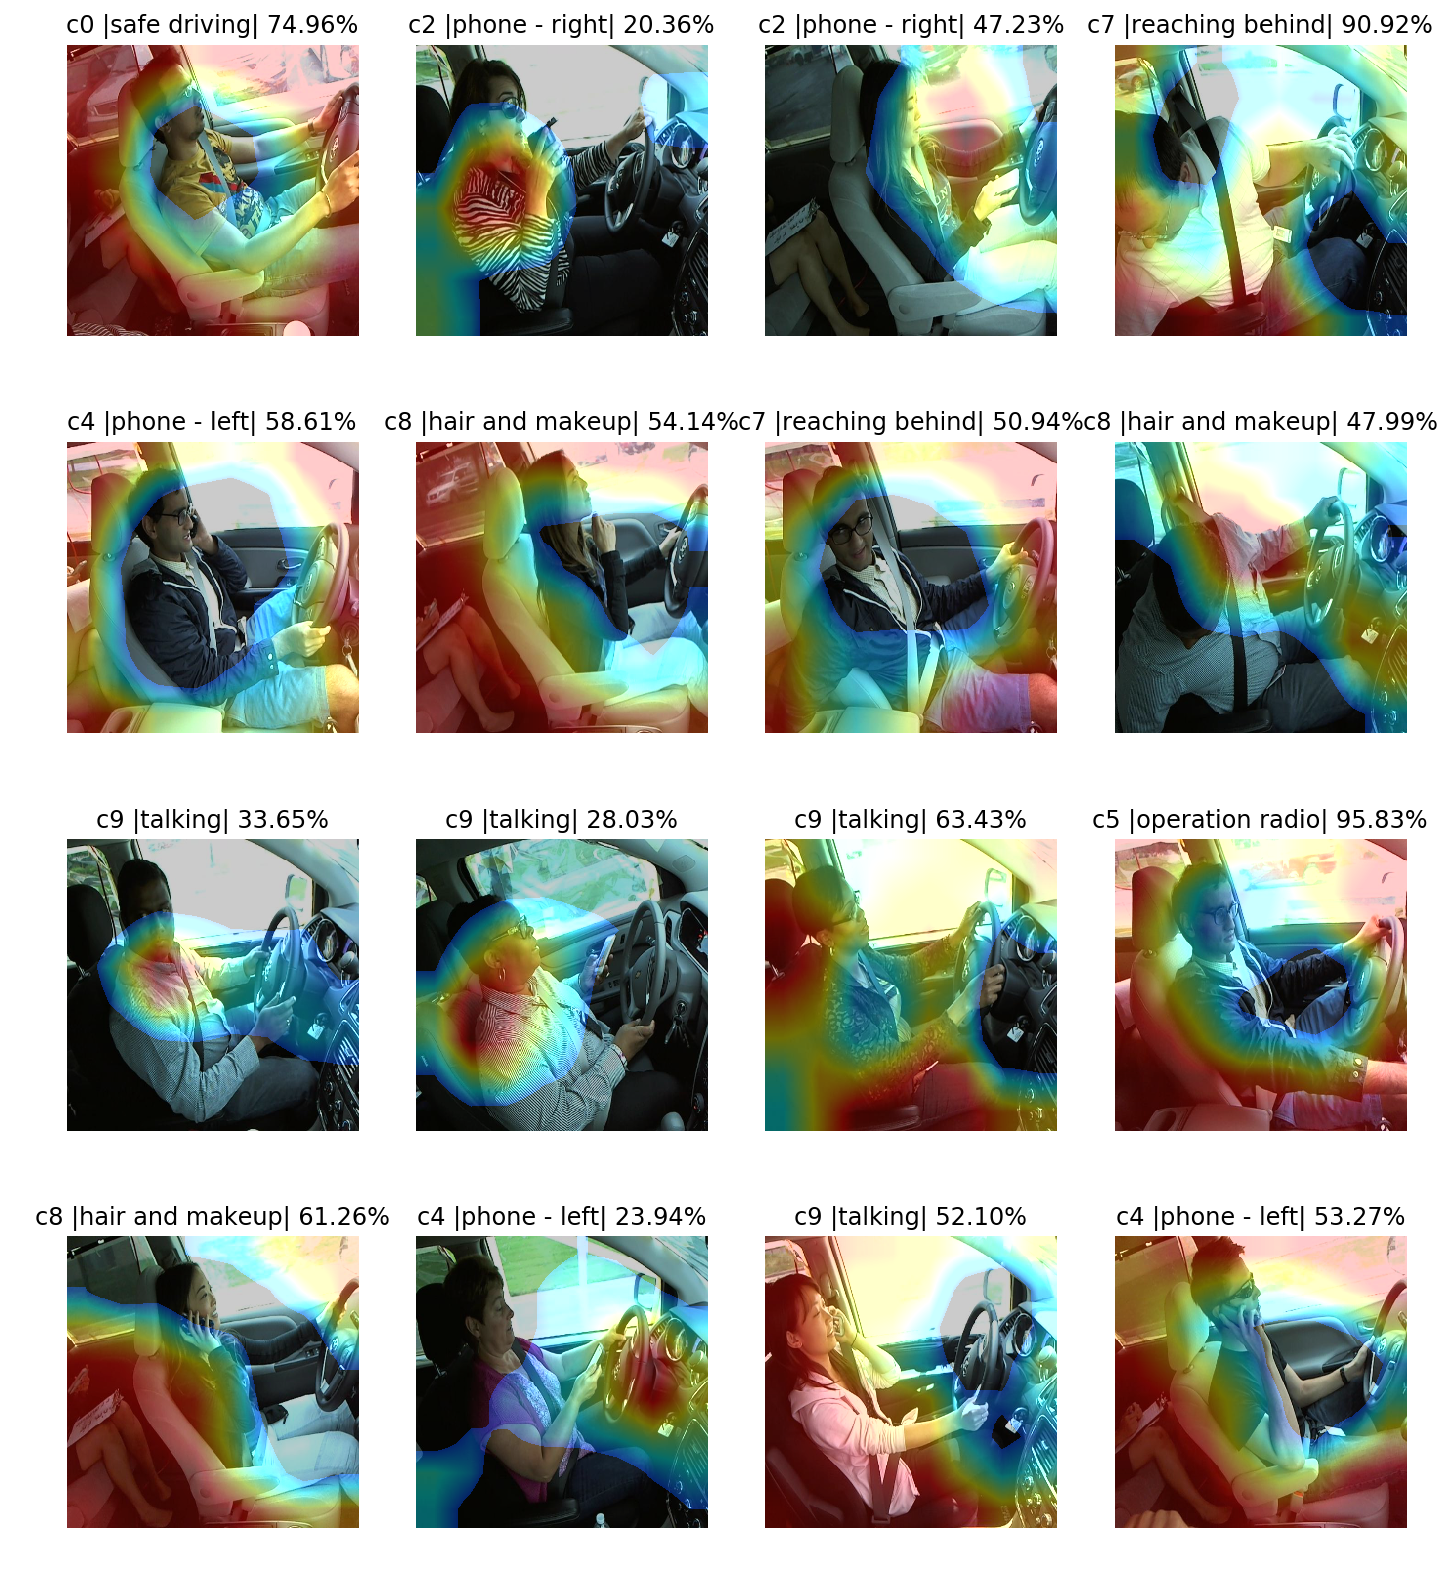

In [13]:
weights = model.layers[313].get_weights()[0]
layer_output = model.layers[310].output
model2 = Model(model.input, [layer_output, model.output])
print("layer_output {0}".format(layer_output))
print("weights shape {0}".format(weights.shape))
show_heatmap_image(model2, weights)